The problem we will solve is to convert from Celcius to Farenheit, where the approximate formula is :
  f = c*1.8 + 32
  
We will give TensorFlow some sample celcius degrees (0,8,15,22,38) and their corresponding Farenheit scales (32,46,59,72,100) and then train a model that figures out the above formula through the training process

#### Importing the dependencies

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals 

In [3]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf 

TensorFlow 2.x selected.


In [0]:
import numpy as np
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#### Setting up training data


In [5]:
celcius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
farenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celcius):
  print("{} degrees celcius = {} degree farenheit".format(c, farenheit[i]))

-40.0 degrees celcius = -40.0 degree farenheit
-10.0 degrees celcius = 14.0 degree farenheit
0.0 degrees celcius = 32.0 degree farenheit
8.0 degrees celcius = 46.0 degree farenheit
15.0 degrees celcius = 59.0 degree farenheit
22.0 degrees celcius = 72.0 degree farenheit
38.0 degrees celcius = 100.0 degree farenheit


#### Creating the model 
We create the model using the Dense Network with a single layer and a single neuron.

input_shape=[1] : This implies that the input to the layer is single valued. The single value is the degrees in celcius. 
units = 1 : This specifies the number of neurons in the layer. This specifies how many internal variables the layer has to try to learn how to solve the problem. This also specifies the output is a single float value representing degrees farenheit. 

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])


#### Assembling the layers
Once the layers are defined, the next step is to assemble the layers into a model. The Sequential model definition takes a list of layers as argument. The model has just one layer, l0


In [0]:
model = tf.keras.Sequential([l0])

Another way of defining and assembling the model is as follows :
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

#### Compiling the model
Before training, the model has to be compiled using the loss function and the optimizer function. Loss function - way of measuring how far off predictions are from actual values. Optimizer function - way of adjusting internal values to minimize loss 





In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

#### Training the model 
Train the model by calling the fit method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [9]:
history = model.fit(celcius, farenheit, epochs=500, verbose=False)
print("Finshed training the model")

Finshed training the model


#### Display trainnnig statistics 


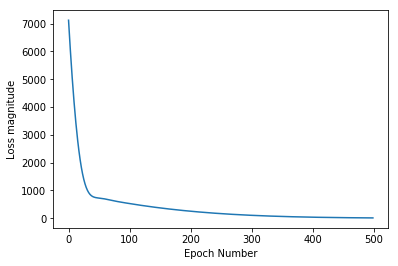

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss magnitude')
plt.plot(history.history['loss'])

#### Making predictions 

In [11]:
print(model.predict([100.0]))

[[211.28435]]


#### Looking at layer weights 

In [12]:
print("The layer weights are : {}".format(l0.get_weights()))

The layer weights are : [array([[1.8278633]], dtype=float32), array([28.498018], dtype=float32)]
